In [1]:
#import packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
from PIL import Image
import os
import argparse
from os.path import dirname, join


In [2]:
os.chdir("C:\\Users\\August\\OneDrive - Københavns Universitet\\Documents\\Uni\\Kandidat i Statskundskab\\Speciale\\kode")

In [3]:
dataset = pd.read_csv("cleandata.csv",index_col="Unnamed: 0")

In [4]:
dataset

,post_nr,date,text,likes,user,date_clean,datetime,days_till_linde
0,0,3 DAYS AGO,Nunarput ♥️,71.0,akimati,AGO-3-DAYS,NaN,NaN
1,1,4 DAYS AGO,So proud of @kunofencker. 🏆🏆🏆 You won the nati...,71.0,akimati,AGO-4-DAYS,NaN,NaN
2,2,FEBRUARY 2,Many people ask me how I can work as a parliam...,100.0,akimati,2021-2-2,2021-02-02,160.0
3,3,JANUARY 23,Relatable af,108.0,akimati,2021-1-23,2021-01-23,150.0
4,4,"DECEMBER 22, 2020",So excited for the kids to get home to us. I e...,19.0,akimati,2020-12-22,2020-12-22,118.0
...,...,...,...,...,...,...,...,...
11679,19,"MARCH 19, 2019",På vej til Ilulissat ❤️ Glæder mig. Håber på g...,24.0,aaja_chemnitz,2019-3-19,2019-03-19,-526.0
11680,20,"FEBRUARY 23, 2019",Så er vi klar til at heppe på @nina_k_j og Jul...,47.0,aaja_chemnitz,2019-2-23,2019-02-23,-550.0
11681,21,"FEBRUARY 14, 2019",Disse dage besøger jeg Tasiilaq. Det er så smu...,41.0,aaja_chemnitz,2019-2-14,2019-02-14,-559.0
11682,22,"DECEMBER 11, 2018",Veloverstået samtale salon med @emileperonard ...,45.0,aaja_chemnitz,2018-12-11,2018-12-11,-624.0


# new using DNN - test on 1 image

In [120]:
path = "C:\\Users\\August\\OneDrive - Københavns Universitet\\Documents\\Uni\\Kandidat i Statskundskab\\Speciale\\kode"
im_path = "posts\\kristianthulesendahl\\pic_45.jpeg"
protopath = "deploy.prototxt.txt"
modelpath = "res10_300x300_ssd_iter_140000.caffemodel"

In [121]:
net = cv2.dnn.readNetFromCaffe(protopath, modelpath)

The code is from https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/

the model is inherint on the Dnn module, also the weigths.

In [122]:
image_raw = cv2.imread(im_path)
image = cv2.resize(image_raw,(640,640)).copy()
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale imag

mean: scalar with mean values which are subtracted from channels. Values are intended to be in (mean-R, mean-G, mean-B) order if image has BGR ordering and swapRB is true.

In [123]:
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 1.3, (640, 640),(104.0, 177.0, 123.0))

In [124]:
net.setInput(blob)
detections = net.forward()

In [125]:
n_faces = 0
faces = []
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]
    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > 0.5:
        
        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        
        if startX < 640 and startY < 640 and endX < 640 and endX < 640:
        
            n_faces += 1
            faces.append(box.astype("int"))
            # draw the bounding box of the face along with the associated
            # probability
           # text = "{:.2f}%".format(confidence * 100)
           # y = startY - 10 if startY - 10 > 10 else startY + 10
           # cv2.rectangle(image, (startX, startY), (endX, endY),
           #     (0, 0, 255), 2)
           # cv2.putText(image, text, (startX, y),
           #     cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
        
# show the output image
#cv2.imshow("Output", image)
#cv2.waitKey(0)
print(n_faces)

1


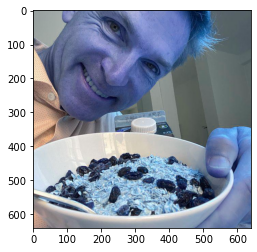

In [126]:
plt.imshow(image)

The model is from Tal and Hasler 2015 

In [127]:
path = "C:\\Users\\August\\OneDrive - Københavns Universitet\\Documents\\Uni\\Kandidat i Statskundskab\\Speciale\\kode"
protopath = "deploy_gender.prototxt"
modelpath = "gender_net.caffemodel"
mean_im = "age_gender_mean.binaryproto"

In [128]:
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
#MODEL_MEAN_VALUES = (96.5020325203252, 117.01321138211382, 173.6107723577236)

In [129]:
gender_list = ['Male', 'Female']

In [130]:
#proto_mean = open(mean_im, "rb").read()

In [131]:
gendernet = cv2.dnn.readNetFromCaffe(protopath, modelpath)

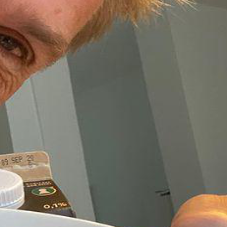

Gender : Male
[[0.99455523 0.00544471]]


In [132]:
for i in range(len(faces)):
    face_img =  image[int(faces[i][1]):int(faces[i][3]), int(faces[i][0]):int(faces[i][2])].copy()
    
    face_img = cv2.resize(face_img,(227,227))
    #face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)

    #face_img = cv2.resize(face_img,(227,227))
    blob = cv2.dnn.blobFromImage(face_img,1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)


    
    gendernet.setInput(blob)
    gender_preds = gendernet.forward()
    #print(detections)
    #display(Image.fromarray(cv2.resize(test_img, (227, 227)),'RGB'))

    #cv2.imshow("Output", face_img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    face_img_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB).copy()
    display(Image.fromarray(face_img_rgb))
    #plt.imshow(face_img)
    #plt.show()
    gender = gender_list[gender_preds[0].argmax()]
    print("Gender : " + gender)
    print(gender_preds)


In [303]:
blue = np.reshape(face_img[:,:,0], -1)
green = np.reshape(face_img[:,:,1], -1)
red = np.reshape(face_img[:,:,2], -1)


print("blue:",blue.mean(),"Green:", green.mean(),"Red:",red.mean())

blue: 96.37736032137244 Green: 116.88746142948631 Red: 173.48363057695667


# Make it into a loop

# OLD using Haar methods


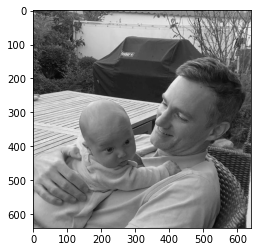

In [13]:
#Loading the image to be tested
test_image = cv2.imread("posts\\rasmus_jarlov\\pic_6.jpeg")

#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')
#Since we know that OpenCV loads an image in BGR format, so we need to convert it into RBG format to be able to display its true colors. Let us write a small function for that.

In [81]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [82]:
os.chdir("C:\\Users\\August\\OneDrive - Københavns Universitet\\Documents\\Uni\\Kandidat i Statskundskab\\Speciale\\kode\\testface-master\\data\\haarcascades")

In [83]:
path = "haarcascade_frontalface_alt2.xml" 
haar_cascade_face = cv2.CascadeClassifier(path)



In [84]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5)

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))


Faces found:  3


In [85]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

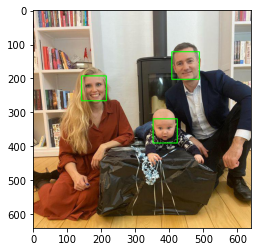

In [86]:
plt.imshow(convertToRGB(test_image))

In [101]:
os.chdir("C:\\Users\\August\\OneDrive - Københavns Universitet\\Documents\\Uni\\Kandidat i Statskundskab\\Speciale\\kode")